In [22]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [23]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Spam\Spam_AN_20.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.778,0.00,0.000,3.756,61.0,278.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.0,0.132,0.0,0.372,0.18,0.048,5.114,101.0,1028.0
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.0,0.135,0.0,0.135,0.00,0.000,3.537,40.0,191.0
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.0,0.223,0.0,0.000,0.00,0.000,3.000,15.0,54.0
4,NaN,0.00,0.00,0.0,NaN,NaN,0.00,0.00,0.00,0.64,...,0.0,0.0,0.054,NaN,0.164,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,NaN,0.00,0.64,0.0,NaN,NaN,0.00,0.00,0.00,0.00,...,0.0,0.0,0.348,NaN,1.160,NaN,NaN,NaN,15.0,NaN
4593,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.00,0.000,3.043,15.0,70.0
4594,0.00,0.00,0.00,0.0,0.00,NaN,NaN,0.00,NaN,0.00,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN
4595,0.17,0.00,0.68,0.0,0.34,0.34,0.00,0.00,0.00,0.00,...,0.0,0.0,0.032,0.0,0.065,0.00,0.000,1.189,5.0,69.0


In [24]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	406
float64		column 2	116
float64		column 3	232
float64		column 4	290
float64		column 5	232
float64		column 6	464
float64		column 7	646
float64		column 8	414
float64		column 9	928
float64		column 10	464
float64		column 11	936
float64		column 12	174
float64		column 13	232
float64		column 14	820
float64		column 15	1284
float64		column 16	638
float64		column 17	754
float64		column 18	870
float64		column 19	298
float64		column 20	1044
float64		column 21	1052
float64		column 22	464
float64		column 23	1400
float64		column 24	870
float64		column 25	1226
float64		column 26	1400
float64		column 27	0
float64		column 28	1458
float64		column 29	1458
float64		column 30	1748
float64		column 31	1168
float64		column 32	1566
float64		column 33	116
float64		column 34	1864
float64		column 35	1748
float64		column 36	1806
float64		column 37	1218
float64		column 38	696
float64		column 39	1226
float64		column 40	1748
float64		column 41	464
float64		colu

In [25]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
count,4191.00000,4481.000000,4365.000000,4307.000000,4365.000000,4133.000000,3951.000000,4183.000000,3669.000000,4133.00000,...,4009.00000,3487.000000,3313.000000,3785.000000,3603.000000,3263.000000,3089.000000,3139.000000,3487.000000,3139.00000
mean,0.10439,0.216867,0.281895,0.065442,0.312575,0.097188,0.115103,0.103727,0.086454,0.23788,...,0.03341,0.033784,0.139335,0.016577,0.275044,0.073155,0.049107,4.844362,50.483797,275.08920
std,0.30078,1.307036,0.508605,1.412225,0.669987,0.279226,0.396630,0.405192,0.280295,0.64891,...,0.29795,0.191811,0.276941,0.112280,0.885683,0.236220,0.502102,28.534257,209.001351,596.84227
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.610500,6.000000,37.00000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.064000,0.000000,0.000000,0.000000,0.000000,2.288000,15.000000,99.00000
75%,0.00000,0.000000,0.420000,0.000000,0.390000,0.000000,0.000000,0.000000,0.000000,0.16000,...,0.00000,0.000000,0.189000,0.000000,0.312000,0.047000,0.000000,3.700000,42.000000,263.00000
max,4.34000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.18000,...,10.00000,4.149000,9.752000,4.081000,32.478000,6.003000,19.829000,1021.500000,9989.000000,15841.00000


<AxesSubplot:>

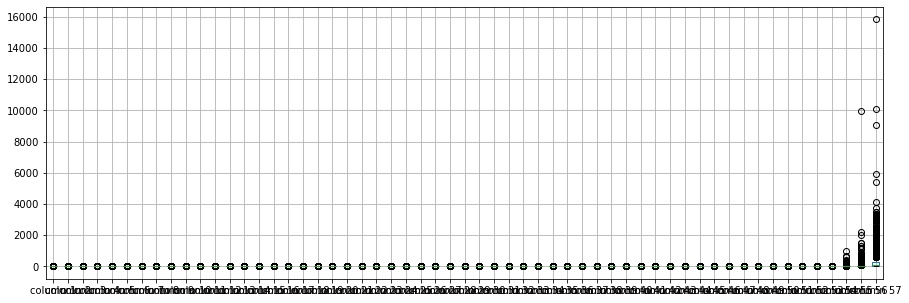

In [26]:
df.boxplot(return_type='axes', figsize=(15,5))

In [27]:
df.mean()

column 1       0.104390
column 2       0.216867
column 3       0.281895
column 4       0.065442
column 5       0.312575
column 6       0.097188
column 7       0.115103
column 8       0.103727
column 9       0.086454
column 10      0.237880
column 11      0.058992
column 12      0.542467
column 13      0.094660
column 14      0.058178
column 15      0.042206
column 16      0.249273
column 17      0.137434
column 18      0.185176
column 19      1.666941
column 20      0.085184
column 21      0.821873
column 22      0.107924
column 23      0.095971
column 24      0.086088
column 25      0.520472
column 26      0.272718
column 27      0.767973
column 28      0.125355
column 29      0.105792
column 30      0.106255
column 31      0.063330
column 32      0.049852
column 33      0.098447
column 34      0.049920
column 35      0.111801
column 36      0.096134
column 37      0.141912
column 38      0.010172
column 39      0.082189
column 40      0.062369
column 41      0.043041
column 42      0

In [28]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
column 1,1.000000,-0.027857,0.059764,0.007676,0.017221,0.061693,0.009670,-0.004102,0.114108,0.039159,...,-0.024610,-0.018381,-0.013575,-0.034126,0.038117,0.110556,-0.006120,0.040076,0.051702,0.075903
column 2,-0.027857,1.000000,-0.033548,-0.006398,-0.025341,-0.026408,0.002619,-0.016292,-0.006329,0.029162,...,-0.015936,-0.008977,-0.049626,-0.017239,-0.013713,-0.006326,0.005763,-0.003386,0.000625,-0.023527
column 3,0.059764,-0.033548,1.000000,-0.018552,0.076026,0.074212,0.026826,0.008749,0.091359,0.029310,...,-0.027904,-0.029344,-0.024527,-0.044158,0.098860,0.082337,-0.004079,0.091302,0.081869,0.044130
column 4,0.007676,-0.006398,-0.018552,1.000000,0.004021,-0.008315,0.022609,-0.002167,0.008774,-0.000024,...,-0.001989,0.005272,-0.005114,-0.006533,-0.001799,0.013532,0.001274,0.005609,0.019812,0.026923
column 5,0.017221,-0.025341,0.076026,0.004021,1.000000,0.044456,0.123875,0.023899,0.017312,0.033030,...,-0.034920,-0.030721,-0.044445,-0.032671,0.019703,0.041987,0.009002,0.057637,0.037484,0.003233
column 6,0.061693,-0.026408,0.074212,-0.008315,0.044456,1.000000,0.046378,0.072893,0.091206,0.010219,...,-0.031348,-0.022886,-0.009914,-0.008812,0.053695,0.105173,0.022733,-0.010762,0.063286,0.068238
column 7,0.009670,0.002619,0.026826,0.022609,0.123875,0.046378,1.000000,0.041085,0.050221,0.051050,...,-0.031143,-0.031962,-0.062261,-0.025445,0.046772,0.086296,0.059784,0.042115,0.042179,-0.012596
column 8,-0.004102,-0.016292,0.008749,-0.002167,0.023899,0.072893,0.041085,1.000000,0.118843,0.084462,...,-0.022587,-0.027184,-0.033143,-0.019184,0.032046,0.070552,-0.010863,0.009725,0.037646,0.031985
column 9,0.114108,-0.006329,0.091359,0.008774,0.017312,0.091206,0.050221,0.118843,1.000000,0.122044,...,-0.021605,-0.006529,-0.029757,0.034901,0.033804,0.130460,-0.002547,0.116346,0.136746,0.220842
column 10,0.039159,0.029162,0.029310,-0.000024,0.033030,0.010219,0.051050,0.084462,0.122044,1.000000,...,-0.013533,0.015831,-0.001090,0.009416,0.021311,0.072530,0.040750,0.070317,0.065792,0.067648


In [29]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [30]:
imputer = md.Midas(layer_structure = [17,17+120,17+120+120,17+120+120+120,17+120+120,17+120,17], vae_layer = False, seed = 1200)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [57]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 438.98500221863856
Epoch: 1 , loss: 434.4119310279341
Epoch: 2 , loss: 440.4993847305351
Epoch: 3 , loss: 437.8323550473522
Epoch: 4 , loss: 434.9876831533186
Epoch: 5 , loss: 437.23553155772777
Epoch: 6 , loss: 438.1947338090956
Epoch: 7 , loss: 427.0839238980921
Epoch: 8 , loss: 388.6846730169104
Epoch: 9 , loss: 363.09812089873526
Epoch: 10 , loss: 335.306860747653
Epoch: 11 , loss: 334.36820474817364
Epoch: 12 , loss: 328.05892067088485
Epoch: 13 , loss: 310.30575451202924
Epoch: 14 , loss: 301.42323874762667
Epoch: 15 , loss: 315.28054152963887
Epoch: 16 , loss: 301.6263183567167
Epoch: 17 , loss: 294.6170776314021
Epoch: 18 , loss: 306.23979762539216
Epoch: 19 , loss: 298.96043669803635
Epoch: 20 , loss: 295.14881082195853
Epoch: 21 , loss: 288.6583534931887
Epoch: 22 , loss: 286.4322606129929
Epoch: 23 , loss: 284.2987776566881
Epoch: 24 , loss: 310.78713787225064
Epoch: 25 , loss: 292.711241399

In [31]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4597, 57)

In [32]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      0.000
column 2      0.000
column 3      0.000
column 4      0.000
column 5      0.000
column 6      0.000
column 7      0.000
column 8      0.000
column 9      0.000
column 10     0.000
column 11     0.000
column 12     0.000
column 13     0.000
column 14     0.000
column 15     0.000
column 16     0.000
column 17     0.000
column 18     0.000
column 19     0.000
column 20     0.000
column 21     0.000
column 22     0.000
column 23     0.000
column 24     0.000
column 25     0.000
column 26     0.000
column 27     0.000
column 28     0.000
column 29     0.000
column 30     0.000
column 31     0.000
column 32     0.000
column 33     0.000
column 34     0.000
column 35     0.000
column 36     0.000
column 37     0.000
column 38     0.000
column 39     0.000
column 40     0.000
column 41     0.000
column 42     0.000
column 43     0.000
column 44     0.000
column 45     1.440
column 46     0.000
column 47     0.000
column 48     0.000
column 49     0.000
column 50     0.196


In [33]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Spam.xlsx', header=None,names=column_names)

In [34]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,0.274191,0.0,0.0,0.0,-1.720207,-0.216265,0.000000,0.0,0.00000,0.0,...,0.0,0.0,0.000000,0.399871,0.000000,0.111381,0.448680,0.894431,0.0,-72.775482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.559719,0.0,0.0,0.0,0.404715,-0.531993,0.000000,0.0,0.00000,0.0,...,0.0,0.0,0.000000,0.755868,0.000000,0.227169,0.799303,-0.142235,0.0,-45.793362
4593,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4594,0.000000,0.0,0.0,0.0,0.000000,0.654638,-0.543936,0.0,-0.52202,0.0,...,0.0,0.0,-0.584548,-0.511705,-0.394523,-0.390304,-0.951833,-0.453480,0.0,-42.358646
4595,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


Calculating NRMSE Value

In [35]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [36]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [37]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

24765.802551844667

In [38]:
denominator=Frobenius_norm(complete_df)
denominator

47458.653692284744

In [39]:
NRMS=numerator/denominator
NRMS


0.5218395513792418

In [40]:
new_df.iloc[66,:]

column 1       0.000
column 2       0.440
column 3       0.890
column 4       0.000
column 5       0.440
column 6       0.000
column 7       0.000
column 8       0.000
column 9       0.000
column 10      0.000
column 11      0.000
column 12      0.440
column 13      0.000
column 14      0.000
column 15      0.000
column 16      0.440
column 17      0.000
column 18      0.890
column 19      2.240
column 20      0.000
column 21      1.340
column 22      0.000
column 23      0.000
column 24      0.000
column 25      0.000
column 26      0.000
column 27      0.000
column 28      0.000
column 29      0.000
column 30      0.000
column 31      0.000
column 32      0.000
column 33      0.000
column 34      0.000
column 35      0.000
column 36      0.000
column 37      0.000
column 38      0.000
column 39      0.000
column 40      0.000
column 41      0.000
column 42      0.000
column 43      0.000
column 44      0.000
column 45      0.440
column 46      0.000
column 47      0.000
column 48    

In [41]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.000000,0.64,0.64,0.0,0.320000,0.000000,0.000000,0.00,0.00000,0.00,...,0.0,0.0,0.000000,0.000000,0.778000,0.000000,0.000000,3.756000,61.0,278.000000
1,0.210000,0.28,0.50,0.0,0.140000,0.280000,0.210000,0.07,0.00000,0.94,...,0.0,0.0,0.132000,0.000000,0.372000,0.180000,0.048000,5.114000,101.0,1028.000000
2,0.000000,0.00,0.00,0.0,0.630000,0.000000,0.310000,0.63,0.31000,0.63,...,0.0,0.0,0.135000,0.000000,0.135000,0.000000,0.000000,3.537000,40.0,191.000000
3,0.000000,0.00,0.00,0.0,1.850000,0.000000,0.000000,1.85,0.00000,0.00,...,0.0,0.0,0.223000,0.000000,0.000000,0.000000,0.000000,3.000000,15.0,54.000000
4,0.274191,0.00,0.00,0.0,0.199793,-0.216265,0.000000,0.00,0.00000,0.64,...,0.0,0.0,0.054000,0.399871,0.164000,0.165381,0.448680,2.565431,4.0,39.224518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.559719,0.00,0.64,0.0,0.404715,-0.531993,0.000000,0.00,0.00000,0.00,...,0.0,0.0,0.348000,0.755868,1.160000,0.227169,0.799303,2.978765,15.0,57.206638
4593,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.00,0.00000,0.00,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.043000,15.0,70.000000
4594,0.000000,0.00,0.00,0.0,0.000000,0.654638,-0.543936,0.00,-0.52202,0.00,...,0.0,0.0,-0.448548,-0.511705,-0.394523,-0.390304,-0.542833,1.383520,12.0,25.641354
4595,0.170000,0.00,0.68,0.0,0.340000,0.340000,0.000000,0.00,0.00000,0.00,...,0.0,0.0,0.032000,0.000000,0.065000,0.000000,0.000000,1.189000,5.0,69.000000


In [42]:
imputations[-1].to_excel("Spam_AN_20(imp).xlsx", index=False, header=False)